
# **Module 10 – Part 02: Cost Function and Gradient Descent**

In this notebook, we will keep things **simple** and rely on existing libraries instead of writing gradient descent by hand.

We will:

1. Reuse the tiny **study hours vs marks** dataset  
2. Fit a **Linear Regression** model using scikit-learn  
3. Compute the **Mean Squared Error (MSE)** using a library function  
4. Briefly show how a gradient-descent-based model (`SGDRegressor`) gives a similar result  

The goal is to understand the **idea** of cost and gradient descent, without doing any manual math.


## **Step 1: Import Libraries**

In [3]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error



## **Step 2: Create the Example Dataset**

We use the same dataset:

| Hours Studied | Marks |
|---------------|--------|
| 2             | 55     |
| 4             | 60     |
| 6             | 70     |
| 8             | 80     |
| 10            | 88     |


In [6]:
#Create the Example Dataset
hours = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)
marks = np.array([55, 60, 70, 80, 88])

hours, marks


(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

## **Step 3: Fit a Linear Regression Model (Closed-Form Solver)**

We start with the usual `LinearRegression` model from scikit-learn.  
This model finds the best fit line using a direct mathematical solution under the hood.


In [10]:
#Fit a Linear Regression Model (Closed-Form Solver)
lin_reg = LinearRegression()
lin_reg.fit(hours,marks)

print("m: ", lin_reg.coef_[0])
print("c: ", lin_reg.intercept_)

m:  4.300000000000002
c:  44.79999999999998



## **Step 4: Compute the Cost (Mean Squared Error) Using a Library**

The **Mean Squared Error (MSE)** is our **cost function** for regression.

We do not compute it manually.  
Instead, we use `mean_squared_error` from `sklearn.metrics`.


In [16]:
#Compute the Cost (Mean Squared Error) Using a Library
pred_marks = lin_reg.predict(hours)
mse_lin = mean_squared_error(marks, pred_marks)

print("MSE for LinerarRegression", mse_lin)

MSE for LinerarRegression 1.5200000000000011



## **Step 5: Visualize the Data and Best Fit Line**

This helps connect the idea of **low cost** with a **good visual fit**.


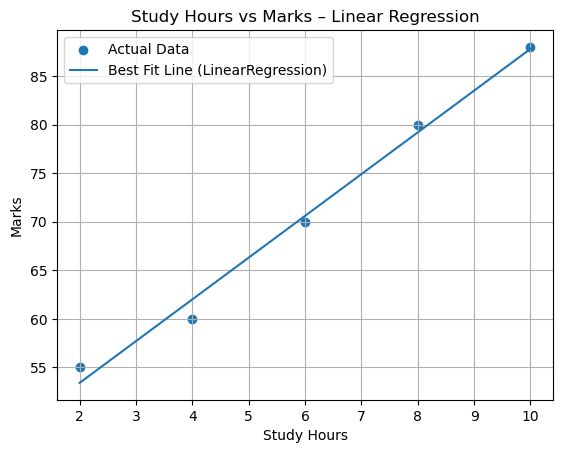

In [18]:
#Visualize the Data and Best Fit Line
plt.scatter(hours, marks, label="Actual Data")

plt.plot(hours, pred_marks, label="Best Fit Line (LinearRegression)")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks – Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


## **Step 6: Use a Gradient-Descent-Based Model – `SGDRegressor`**

`SGDRegressor` is a regression model that uses **Stochastic Gradient Descent (SGD)** internally.  
We will:

- Fit `SGDRegressor` on the same data  
- Compare its slope, intercept, and MSE with `LinearRegression`  

You can think of `SGDRegressor` as:  
> “Same goal (best line), but using gradient descent steps instead of a direct formula.”


In [38]:
#Use a Gradient-Descent-Based Model – SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, learning_rate="invscaling", eta0=0.01, random_state=42)

sgd_reg.fit(hours, marks)

print("m:",sgd_reg.coef_[0])
print("c:",sgd_reg.intercept_[0])

pred_sgd = sgd_reg.predict(hours)
mse_sgd = mean_squared_error(marks, pred_marks)

print("MSE of SGD: ", mse_sgd)

m: 5.698065492806587
c: 34.475265427340794
MSE of SGD:  1.5200000000000011


C:\Users\ImranHossain\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



## **Step 7: Compare Both Lines Visually**

We plot both:

- The line from `LinearRegression` (exact solution)  
- The line from `SGDRegressor` (gradient descent solution)  


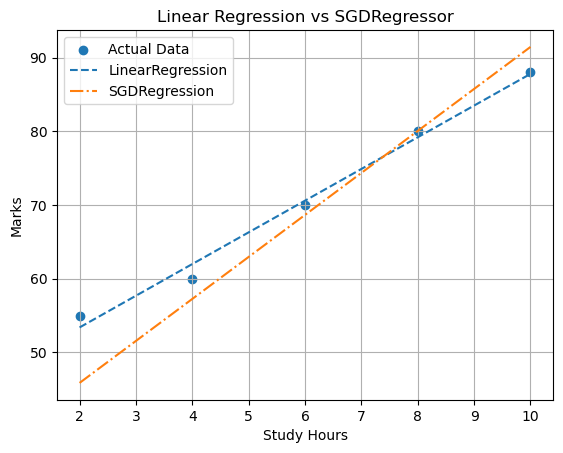

In [41]:
#Compare Both Lines Visually
plt.scatter(hours, marks, label="Actual Data")

plt.plot(hours, pred_marks, label="LinearRegression", linestyle="--")
plt.plot(hours, pred_sgd, label="SGDRegression", linestyle="-.")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression vs SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()